# CUSTOMER SEGMENTATION

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read dataset

data = pd.read_csv("E:\PYTHON.AMITY\Mall_Customers.csv")

In [4]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.shape

(200, 5)

In [9]:
#Renaming the columns

dt=data.rename(columns = {"Annual Income (k$)" : 'Ann_Inc', 'Spending Score (1-100)': 'Spend_score'})
dt.columns

Index(['CustomerID', 'Gender', 'Age', 'Ann_Inc', 'Spend_score'], dtype='object')

In [10]:
#Drop unnecessary column
dt = dt.drop('CustomerID', axis = 1)

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       200 non-null    object
 1   Age          200 non-null    int64 
 2   Ann_Inc      200 non-null    int64 
 3   Spend_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
dt.head()

,Gender,Age,Ann_Inc,Spend_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
#check if dataset has any null values
dt.isnull().any().any()

False

## Visualization

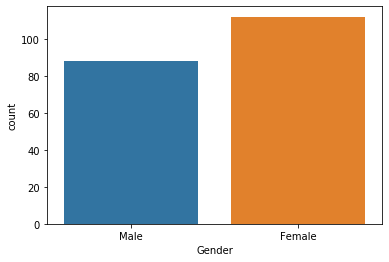

In [35]:
fig = plt.figure(figsize =(6,4))
sns.countplot(dt['Gender'])

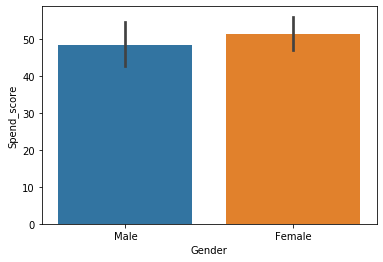

In [36]:
# We can see there are more number of feamles than males
#now we will check the how gender is related to spending score
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'Gender', y = 'Spend_score', data = dt)

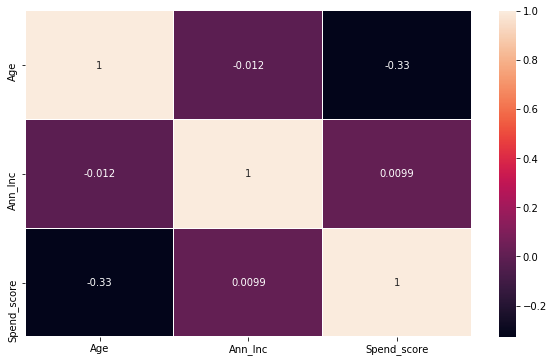

In [39]:
# We can see that females spend slightly more than males. But is not enough to to anaylsis.
# We will now check the relationhip between all the variables with each other using correlation

fig = plt.figure(figsize = (10,6))
sns.heatmap(dt.corr(), annot = True, linewidth = 0.03)
plt.show()

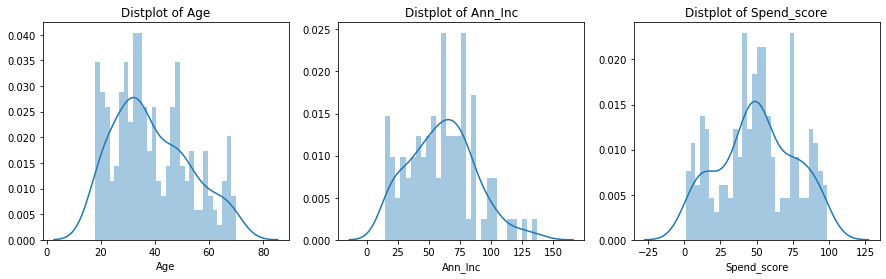

In [18]:
fig = plt.figure(figsize = (15,4))
n = 0
for x in ['Age','Ann_Inc','Spend_score']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(dt[x], bins =30)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [19]:
age_18_25 = dt.Age[(dt.Age >= 18) & (dt.Age <=25)]
age_26_35 = dt.Age[(dt.Age >= 26) & (dt.Age <=35)]
age_36_45 = dt.Age[(dt.Age >= 36) & (dt.Age <=45)]
age_46_55 = dt.Age[(dt.Age >= 46) & (dt.Age <=55)]
age_56_70 = dt.Age[dt.Age >= 56]

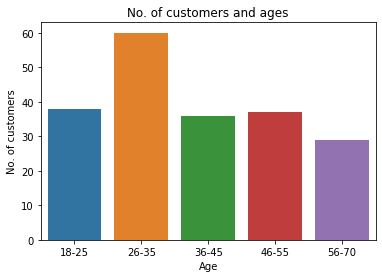

In [20]:
age_x = ['18-25', '26-35', '36-45', '46-55', '56-70']
age_y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45), len(age_46_55.values), len(age_56_70.values)]

plt.figure(figsize =(6,4))
sns.barplot(x = age_x, y = age_y)
plt.title("No. of customers and ages")
plt.xlabel('Age')
plt.ylabel('No. of customers')
plt.show()

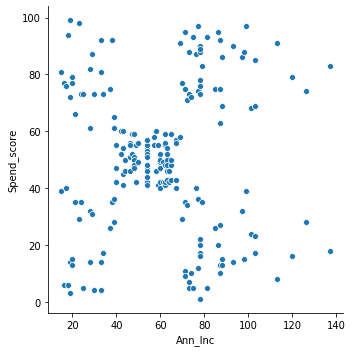

In [22]:
sns.relplot(x= 'Ann_Inc', y= 'Spend_score', data = dt)

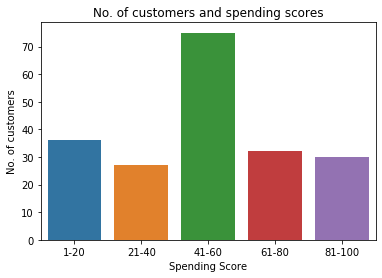

In [25]:
ss_1_20 = dt.Spend_score[(dt.Spend_score >=1) & (dt.Spend_score <=20)]
ss_21_40 = dt.Spend_score[(dt.Spend_score >=21) & (dt.Spend_score <=40)]
ss_41_60 = dt.Spend_score[(dt.Spend_score >=41) & (dt.Spend_score <=60)]
ss_61_80 = dt.Spend_score[(dt.Spend_score >=61) & (dt.Spend_score <=80)]
ss_81_100 = dt.Spend_score[(dt.Spend_score >=81) & (dt.Spend_score <=100)]

ss_x= ['1-20', '21-40', '41-60', '61-80', '81-100']
ss_y = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize =(6,4))
sns.barplot(x = ss_x, y = ss_y)
plt.title("No. of customers and spending scores")
plt.xlabel('Spending Score')
plt.ylabel('No. of customers')
plt.show()


In [29]:
# Making  the independent variables matrix
X = dt.loc[:, ['Ann_Inc', 'Spend_score']].values

In [30]:
#Using KMeans for clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

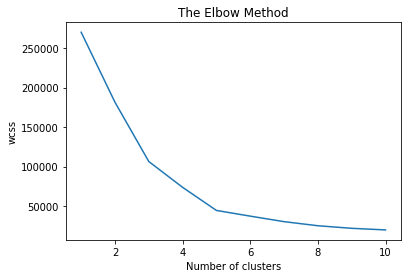

In [32]:
#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)


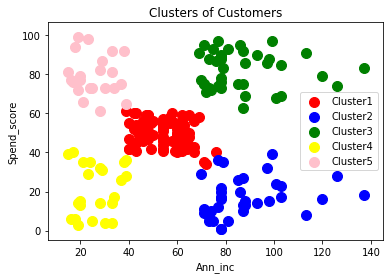

In [34]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers')
plt.xlabel('Ann_inc')
plt.ylabel('Spend_score')
plt.legend()
plt.show()